# Empirical CDF

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [17]:
def I(rv_X: float, value: float) -> int:
    if rv_X <= value:
        return 1
    else:
        return 0

def Fn(X:list, value: float) -> float:
    sum = 0
    for i in range(len(X)):
        sum += I(X[i], value)
    
    return sum / len(X)


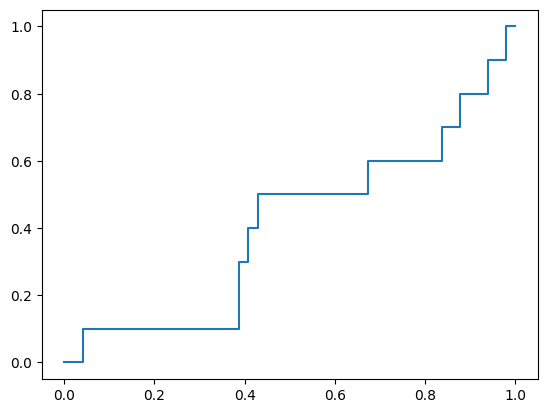

In [52]:
data_size = 10

random_X = np.random.randint(0, 100, data_size) / 100

x_range = np.linspace(0, 100) / 100
y_val = [Fn(random_X, x_range[i]) for i in range(len(x_range))]
# print(X)
# print(y_val)
plt.plot(x_range, y_val, drawstyle='steps-post')

# Bootstrap

0.012566214742784354


(array([ 27., 138., 243., 254., 198.,  81.,  32.,  15.,   5.,   7.]),
 array([0.11116832, 0.18354231, 0.2559163 , 0.32829029, 0.40066428,
        0.47303826, 0.54541225, 0.61778624, 0.69016023, 0.76253422,
        0.83490821]),
 <BarContainer object of 10 artists>)

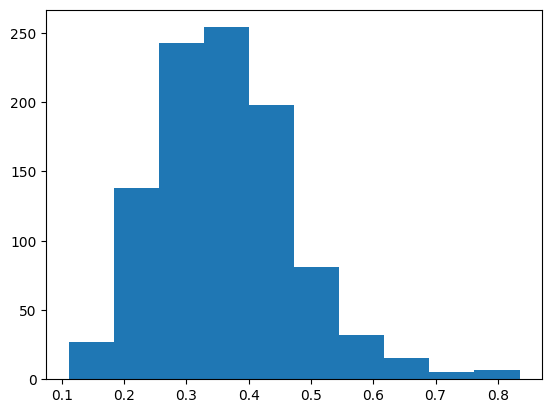

In [71]:
sim = 1000
sample_num = 20
median_all = np.zeros(sim)

for i in range(sim):
    rand_variables = np.random.gamma(1, 1/2, size=sample_num)
    median_all[i] = np.median(rand_variables)

print(np.var(median_all))
plt.hist(median_all)

0.07167683218208915


(array([ 10.,  39., 119., 225., 256., 204., 101.,  35.,   9.,   2.]),
 array([0.01866241, 0.19647723, 0.37429205, 0.55210687, 0.72992169,
        0.9077365 , 1.08555132, 1.26336614, 1.44118096, 1.61899578,
        1.7968106 ]),
 <BarContainer object of 10 artists>)

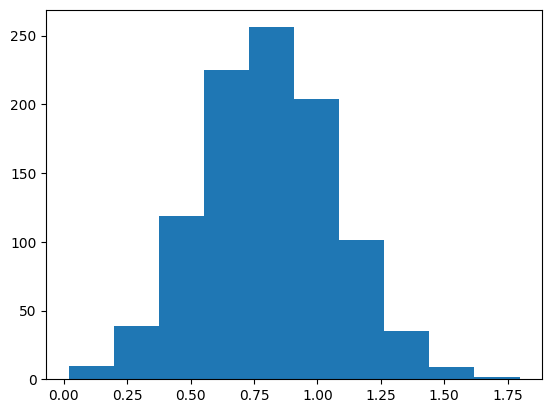

In [70]:
sim = 1000
sample_num = 20
mean_all = np.zeros(sim)

for i in range(sim):
    rand_Y1 = np.random.binomial(1, 0.3, size=sample_num)
    rand_Y2 = np.random.binomial(1, 0.5, size=sample_num)
    rand_X = np.random.normal(rand_Y1+rand_Y2, 1, size=sample_num)
    mean_all[i] = np.mean(rand_X)

print(np.var(mean_all))
plt.hist(mean_all)

# likelihood function

In [206]:
def likelihood(p: float, n: int, s: float) -> float:
    return (p**s) * (1-p)**(n-s)

MLE of p : 0.33


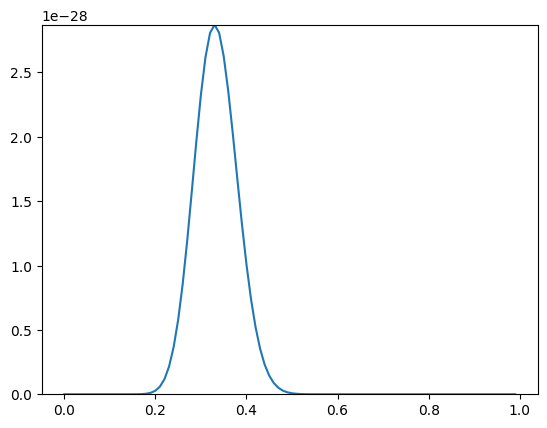

In [281]:
import sympy as sy

# set parameters
sample_size = 100
p = 0.3
bernoulli_rv = np.random.binomial(1, p, sample_size)
s = np.sum(bernoulli_rv)

# define likelihood function and find x for local maximum
p = sy.symbols('p')
f = (p**s) * (1-p)**(sample_size-s)
df = sy.diff(f, p)
solution = sy.solve(df)

# set x, y for graph
p_range = np.arange(0, 1, 0.01)
y_val = [f.subs(p, _p) for _p in p_range]

# plot graph and MLE of p
plt.ylim([0, float(max(y_val))])
plt.plot(p_range, y_val)
print(f"MLE of p : {float(solution[1])}")

# Parametric Bootstrap

In [388]:
# set parameters
sim = 100
sample_size = 1000
bernoulli_rv = np.random.binomial(1, 0.4, sample_size)

# MLE estimation by delta method
p_hat = np.mean(bernoulli_rv)
g_hat = np.log(p_hat / (1 - p_hat))


# 1. se of MLE by delta method
se_of_g_hat = 1/np.sqrt(p_hat * (1-p_hat) * sample_size)


# 2. se of MLE by parametric bootstrap
result = np.zeros(sim)

for i in range(sim):
    
    # extract data from pdf with MLE estimator
    bernoulli_rv_sim = np.random.binomial(1, p_hat, sample_size)
    
    # MLE estimation by delta method
    p_hat_sim = np.mean(bernoulli_rv_sim)
    g_hat_sim = np.log(p_hat_sim / (1 - p_hat_sim))
    result[i] = g_hat_sim


print(f"MLE estimator of p : {p_hat}")
print(f"SE from delta method : {se_of_g_hat}")
print(f"SE from parametric bootstrap : {np.std(result)}" )

MLE estimator of p : 0.389
SE from delta method : 0.06486412952112204
SE from parametric bootstrap : 0.06897693760883096
